間斷複利  
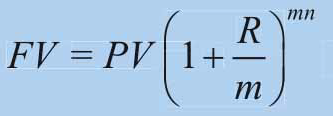  
複利次數與本金(1000元，年利5%)  
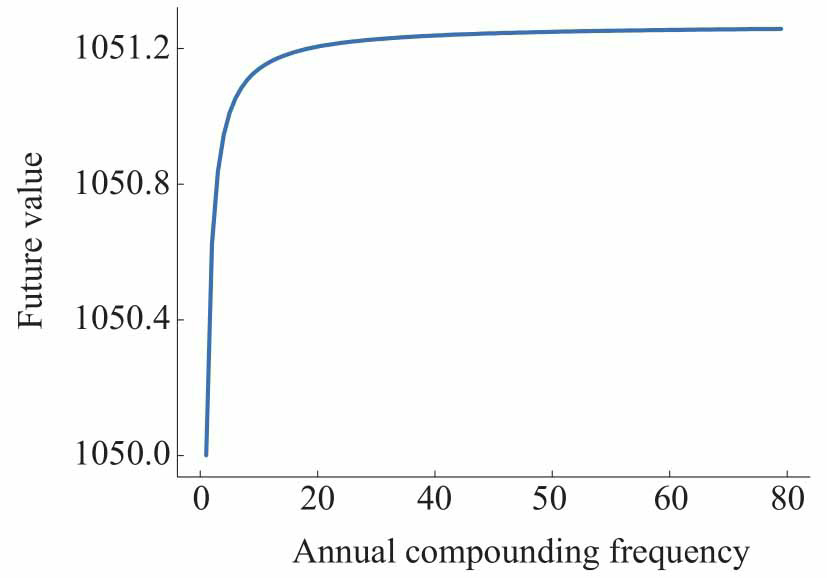

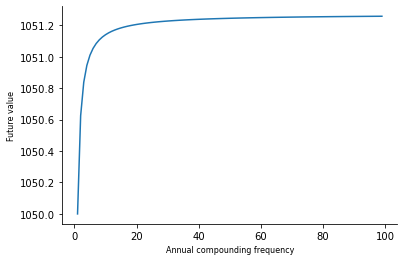

In [1]:
import numpy as np
import matplotlib.pyplot as plt

r = 0.05
pv = 1000
m = np.arange(1,100)
fv = pv*(1+r/m)**m

plt.figure()
plt.plot(m,fv)
plt.xlabel('Annual compounding frequency',fontsize=8)
plt.ylabel('Future value',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')


當次數按近無限，取極限  
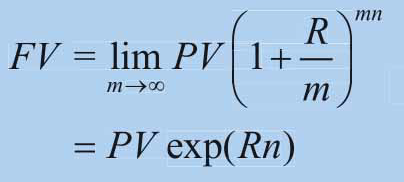  
QuantLib包日數協議:  
ActualActual 實際天數  
Thirty360 一年360天 一月30天  
Actual360 分子用實際天數 分母用360  
Actual365Fixed 分子用實際天數 分母用365  
Actual365NoLeap 分子用實際天數 分母用365 所有年都365天  
Business252 分子是營業日天數 分母用252  
SimpleDayCounter 簡單日計次數  
  
債券:可在二級市場交易  
貸款(loan):不能  
零息債  
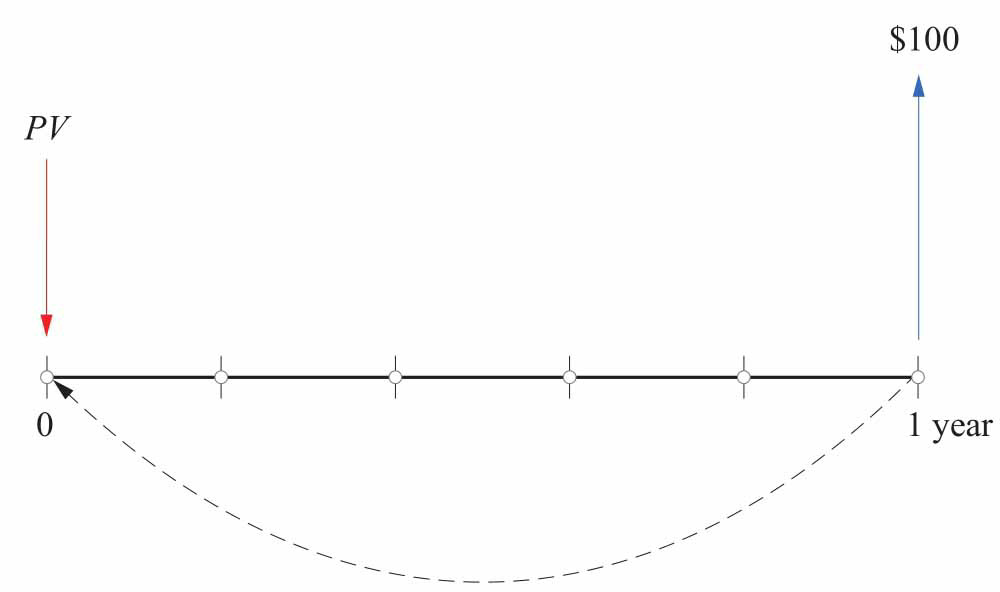  
含息(100 200 每年1次)  
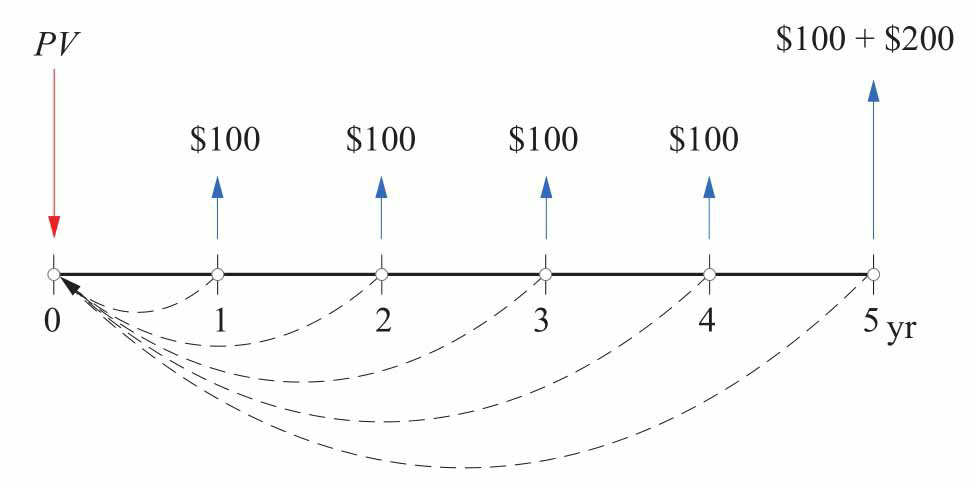  
TIPS=treasury inflation protected securities  
  
債券到期報酬率(YTM/Bond Yield)  
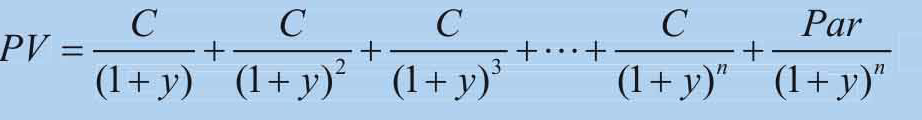  
  
折溢價  
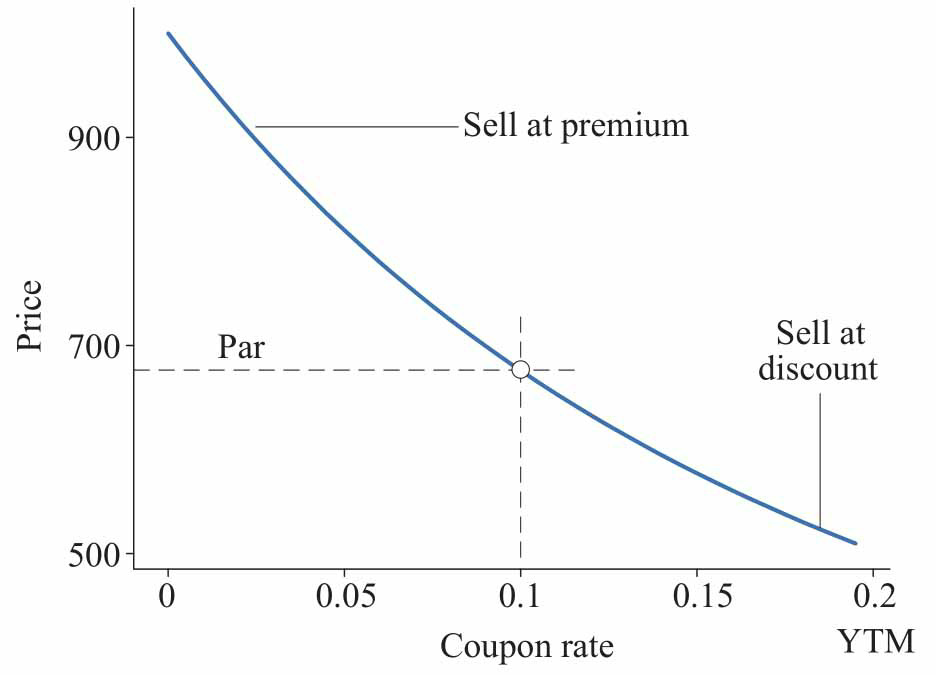  





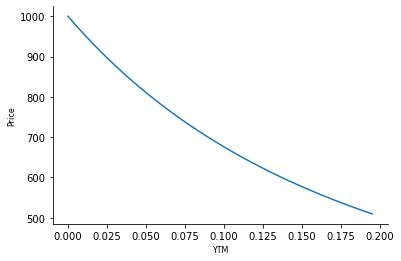

In [2]:
import numpy as np
import matplotlib.pyplot as plt

coupon_rate = 0.1
Par = 1000
n = 10
ytm = np.arange(0,0.2,0.005)
pv = 0

for i in range(n):
    pv = Par*coupon_rate/(1+ytm)**i + pv 

plt.plot(ytm,pv)
plt.xlabel('YTM',fontsize=8)
plt.ylabel('Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')



full price/dirty price/gross price與clean price/quoted price/flat price差額為應計息(accrued interest,AI)，在剛付息後兩者相等，三者關係圖為  
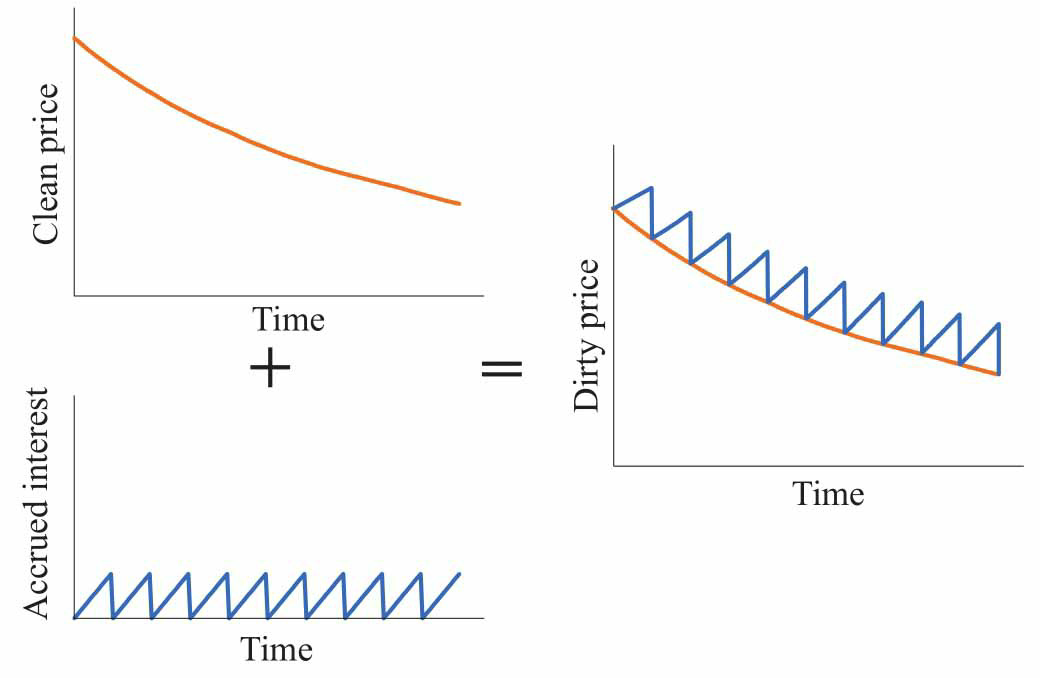  
其中AI計息公式為  
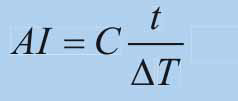  
t為距離上一個付息之時間，delta t為付息間隔(eg:每180日)，即隨t上升趨近於一般區間利息(COUPON)  
  
假設在到下個付息日前，持有人甲把債券賣掉，應計利息AI應歸甲方所有，剩下的那部分利息(COUPON-AI)歸乙方  
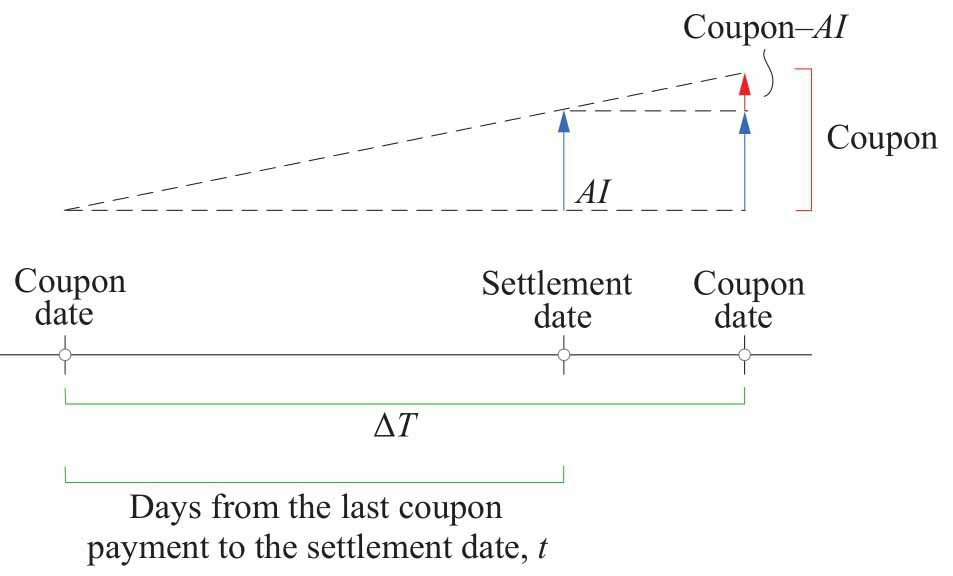  
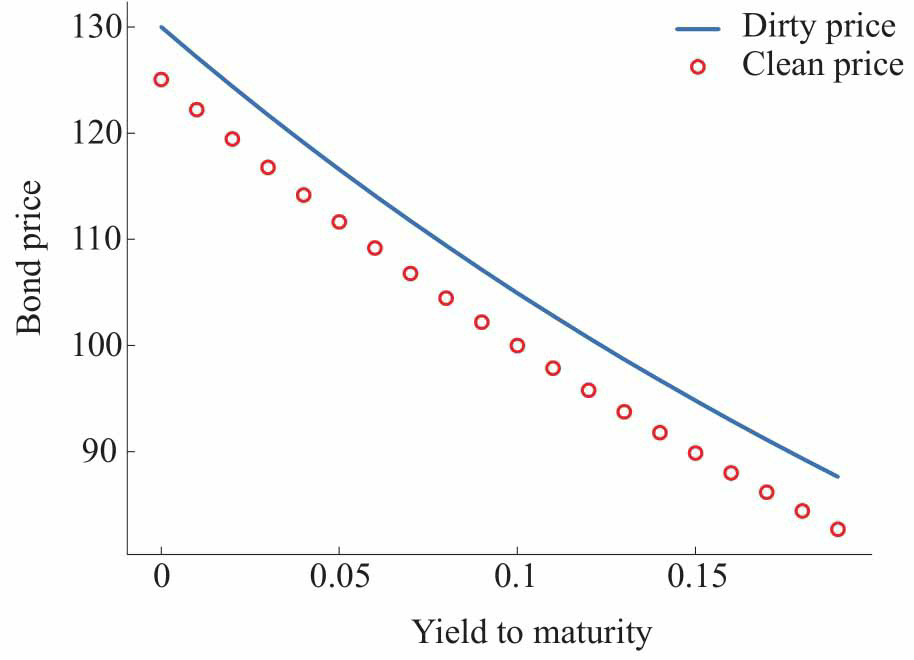



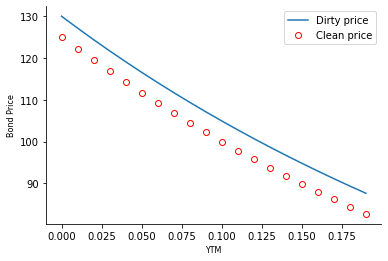

In [3]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
couponRate = .1
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

ytm = np.arange(0,0.2,0.01)
cleanPrice = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))

for i in range(len(ytm)):
    cleanPrice[i] = fixedRateBond.cleanPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.plot(ytm, dirtyPrice,label='Dirty price')
plt.plot(ytm, cleanPrice,'o',color ='r',fillstyle='none',label='Clean price')
plt.legend(loc='upper right')
plt.xlabel('YTM',fontsize=8)
plt.ylabel('Bond Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')




     July 15th, 2015     4.250000
  January 15th, 2016     4.250000
     July 15th, 2016     4.250000
  January 17th, 2017     4.250000
     July 17th, 2017     4.250000
  January 16th, 2018     4.250000
     July 16th, 2018     4.250000
  January 15th, 2019     4.250000
     July 15th, 2019     4.250000
  January 15th, 2020     4.250000
  January 15th, 2020   100.000000
     July 15th, 2015     1.500000
  January 15th, 2016     1.500000
     July 15th, 2016     1.500000
  January 17th, 2017     1.500000
     July 17th, 2017     1.500000
  January 16th, 2018     1.500000
     July 16th, 2018     1.500000
  January 15th, 2019     1.500000
     July 15th, 2019     1.500000
  January 15th, 2020     1.500000
  January 15th, 2020   100.000000


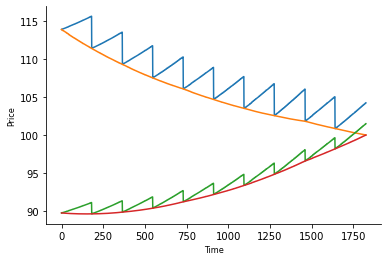

In [4]:
#折溢債clean price 隨時間變化
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(15, 1, 2015)
spotDates = [ql.Date(15, 1, 2015),ql.Date(15, 1, 2016), ql.Date(15, 1, 2017),ql.Date(15, 1, 2018),ql.Date(15, 1, 2019),ql.Date(15, 1, 2020)]
spotRates = [0.027, 0.035, 0.042,0.047,0.052,0.055]
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2015)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)#半年
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
dayCount = ql.Thirty360()
couponRate1 = .085
coupons1 = [couponRate1]

couponRate2 = .03
coupons2 = [couponRate2]

# Now lets construct the FixedRateBond
settlementDays = 0
faceValue = 100
fixedRateBond1 = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons1, dayCount)
fixedRateBond2 = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons2, dayCount)

dirtyPrice1 = np.zeros(1826)
cleanPrice1 = np.zeros(1826)
dirtyPrice2 = np.zeros(1826)
cleanPrice2 = np.zeros(1826)

for i in range(1826):
    ql.Settings.instance().evaluationDate = todaysDate + i
    spotCurve = ql.ZeroCurve(spotDates, spotRates, dayCount, calendar, interpolation,
                                 compounding, compoundingFrequency)
    spotCurveHandle = ql.YieldTermStructureHandle(spotCurve)

    # create a bond engine with the term structure as input;
    # set the bond to use this bond engine
    bondEngine = ql.DiscountingBondEngine(spotCurveHandle)
    fixedRateBond1.setPricingEngine(bondEngine)
    fixedRateBond2.setPricingEngine(bondEngine)

    # Finally the price
    fixedRateBond1.NPV()
    dirtyPrice1[i] = fixedRateBond1.dirtyPrice()
    cleanPrice1[i] = fixedRateBond1.cleanPrice()
    
    fixedRateBond2.NPV()
    dirtyPrice2[i] = fixedRateBond2.dirtyPrice()
    cleanPrice2[i] = fixedRateBond2.cleanPrice()

for c in fixedRateBond1.cashflows():
    print('%20s %12f' % (c.date(), c.amount())) 
    
for c in fixedRateBond2.cashflows():
    print('%20s %12f' % (c.date(), c.amount())) 


plt.plot(dirtyPrice1)
plt.plot(cleanPrice1)
plt.plot(dirtyPrice2)
plt.plot(cleanPrice2)
plt.xlabel('Time',fontsize=8)
plt.ylabel('Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')





實務債券折現，用對應之zero rate 或 spot rate，非恆定  
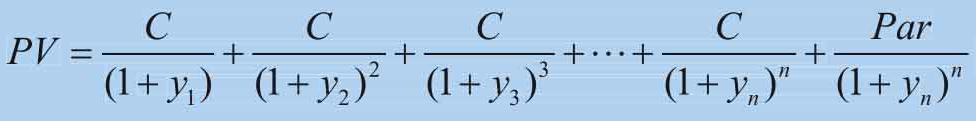  
連續  
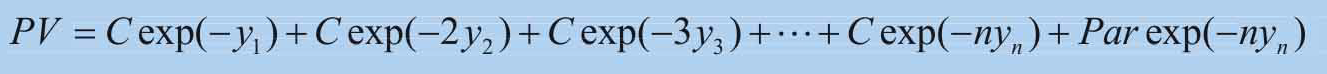  
bootstrapping yield curve計算spot rate  
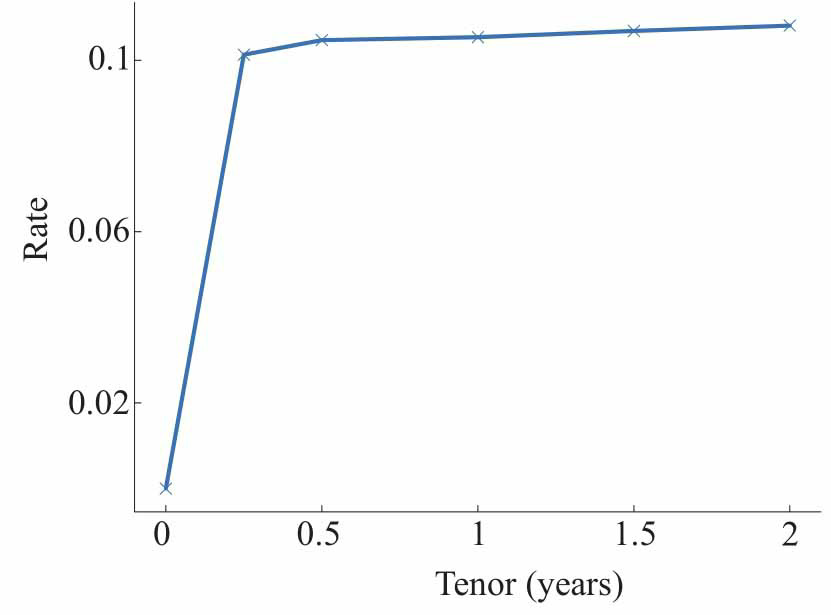

0.0
0.25
0.5
1.0
1.5
2.0


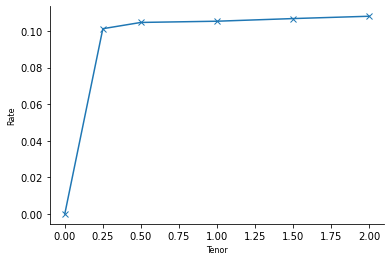

In [5]:
#eg:相似三角形
import QuantLib as ql
import matplotlib.pyplot as plt

calc_date = ql.Date(15, 1, 2020)
ql.Settings.instance().evaluationDate = calc_date

data = [
    ('15-01-2020', '15-04-2020', 0, 97.5),#0r3
    ('15-01-2020', '15-07-2020', 0, 94.9),#0r6
    ('15-01-2020', '15-01-2021', 0, 90.0),
    ('15-01-2020', '15-07-2021', 8.0,96.0),
    ('15-01-2020', '15-01-2022', 12.0, 101.6),
]

helpers = []
day_count = ql.Thirty360()
settlement_days = 0
face_amount = 100

for issue_date, maturity, coupon, price in data:
    price = ql.QuoteHandle(ql.SimpleQuote(price))
    issue_date = ql.Date(issue_date, '%d-%m-%Y')
    maturity = ql.Date(maturity, '%d-%m-%Y')
    schedule = ql.MakeSchedule(issue_date, maturity, ql.Period(ql.Semiannual))
    helper = ql.FixedRateBondHelper(price, settlement_days, face_amount, schedule, [coupon / 100], day_count)
    helpers.append(helper)
    
yieldcurve = ql.PiecewiseLogCubicDiscount(calc_date, helpers, day_count)   
spots = []
tenors = []

for d in yieldcurve.dates():
    yrs = day_count.yearFraction(calc_date, d)
    print(yrs)
    compounding = ql.Compounded
    # compounding = ql.Simple
    freq = ql.Semiannual
    freq = ql.Quarterly
    freq = ql.Daily
    # freq = ql.Continuous
    zero_rate = yieldcurve.zeroRate(yrs, compounding, freq)
    tenors.append(yrs)
    eq_rate = zero_rate.equivalentRate(day_count,
                                       ql.Compounded,
                                       freq,
                                       calc_date,
                                       d).rate()
    spots.append(eq_rate)
    

plt.plot(tenors,spots,'x-')
plt.xlabel('Tenor',fontsize=8)
plt.ylabel('Rate',fontsize=8) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

#https://www.linkedin.com/pulse/python-bootstrapping-zero-curve-sheikh-pancham




Macaulay duration:平均還$時間  
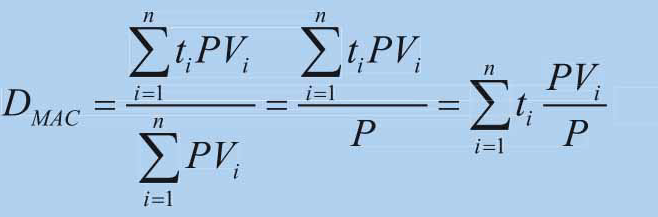  
連續  
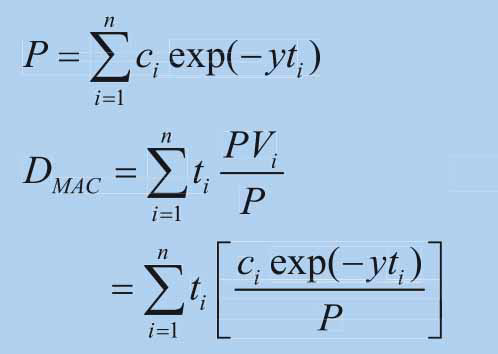  
債券價格p與報酬y之關係  
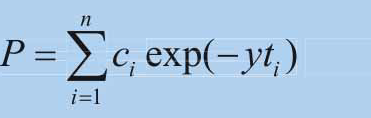  
當y發生小變化delta y，p的變化近似表示為(-號因兩者為相反方向)    
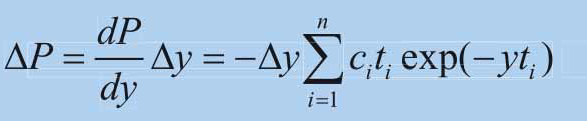  
又因Macaulay duration  
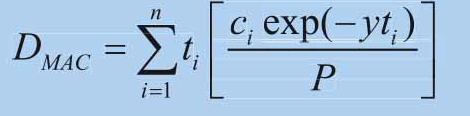  
得  
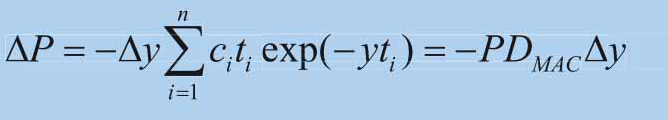  
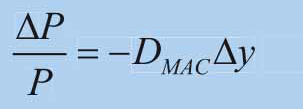  
線性關係:價與報酬  
  
在上面推導中假設了(y=年利率)  
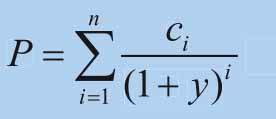  
當y小變化時，p的下一近似表示為  
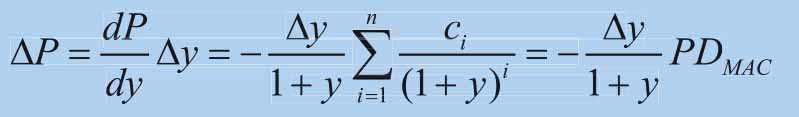  
整理後  
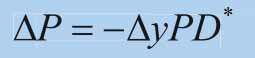  
其中D*(modified duration)為  
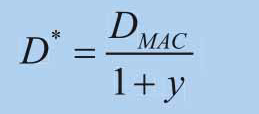  
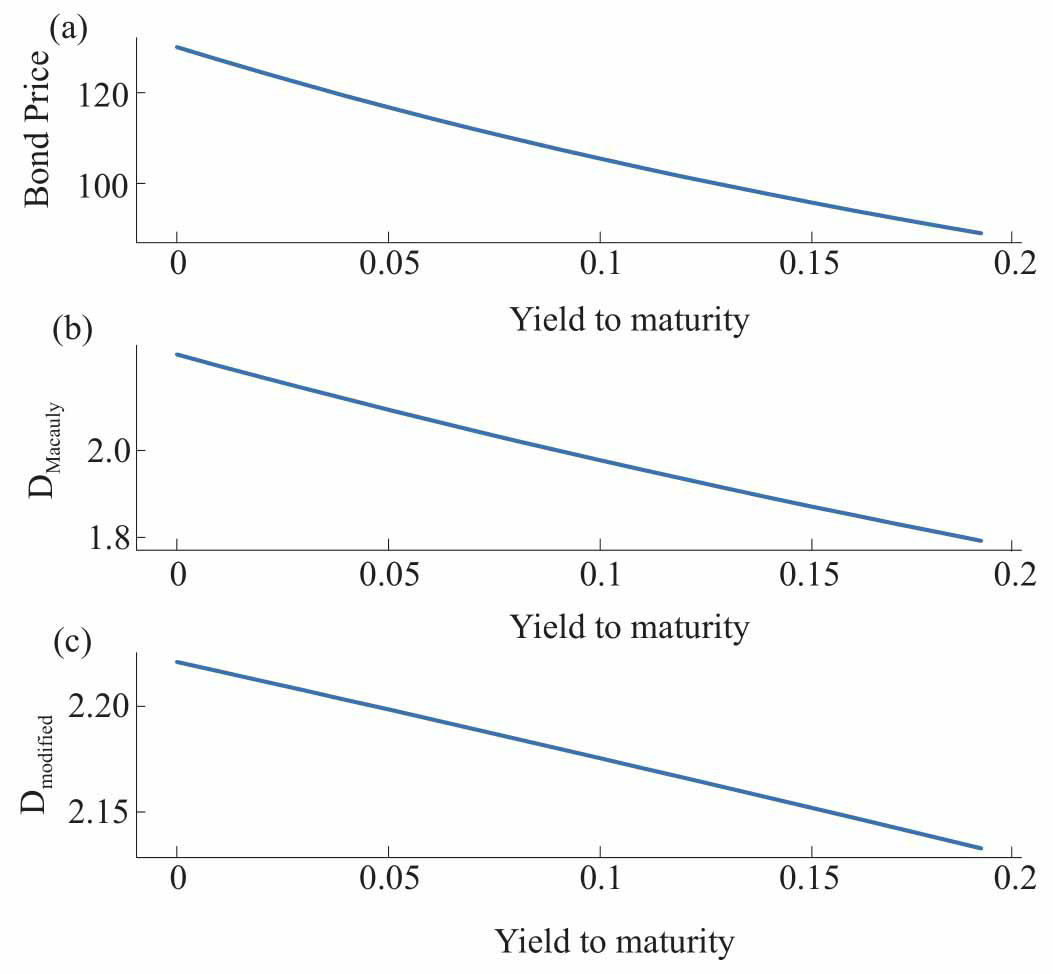  
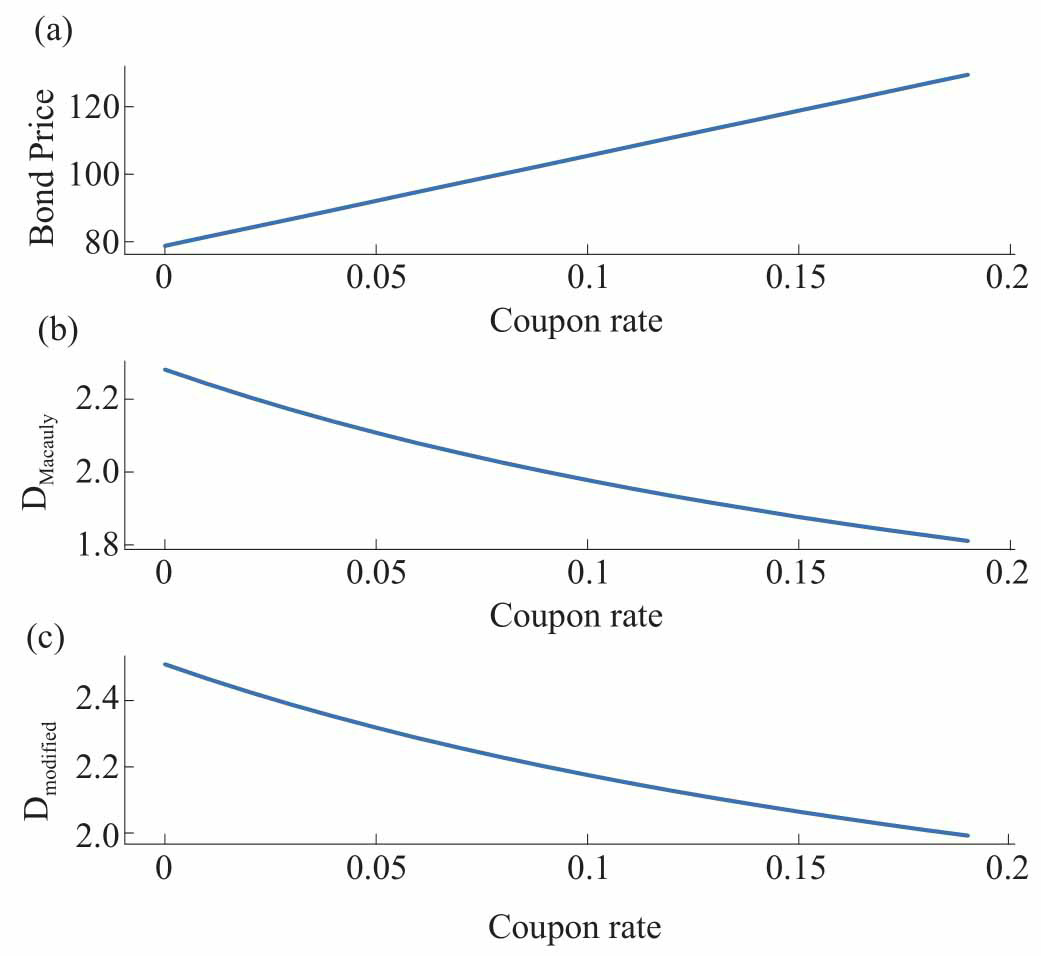  
https://www.youtube.com/watch?v=ierfFNvtfzc modified 推導，基本上就是從利息與本金項抽取(1/1+y)與-1出來，提取後剩下的就是Mac duration與p  

兩個duration均假設:cash flow不隨利率變動(即不含權)

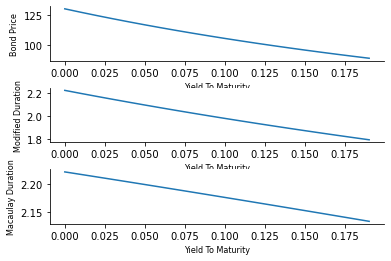

In [6]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
dayCount = ql.Thirty360()
couponRate = .1
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

ytm = np.arange(0,0.2,0.01)
duration_mod = np.zeros(len(ytm))
duration_mac = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))

for i in range(len(ytm)):
    y=ytm[i]
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,y,ql.ActualActual(), ql.Compounded, ql.Annual, ql.Duration.Modified)
    duration_mac[i] = ql.BondFunctions.duration(fixedRateBond,y,ql.ActualActual(), ql.Compounded, ql.Annual, ql.Duration.Macaulay)
    # cleanPrice[i] = fixedRateBond.cleanPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(y,fixedRateBond.dayCounter(), ql.Compounded, ql.Annual)
    
plt.figure(1)
plt.subplot(311)    
plt.plot(ytm, dirtyPrice)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Bond Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(ytm, duration_mod)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Modified Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(ytm, duration_mac)

plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Macaulay Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)







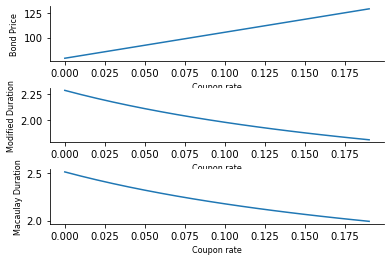

In [7]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
dayCount = ql.Thirty360()
couponRate = np.arange(0,0.2,0.01)

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100

ytm = .1
duration_mod = np.zeros(len(couponRate))
duration_mac = np.zeros(len(couponRate))
dirtyPrice = np.zeros(len(couponRate))

for i in range(len(couponRate)):
    coupons = [couponRate[i]]
    fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,ytm,ql.ActualActual(), ql.Compounded, ql.Annual, ql.Duration.Modified)
    duration_mac[i] = ql.BondFunctions.duration(fixedRateBond,ytm,ql.ActualActual(), ql.Compounded, ql.Annual, ql.Duration.Macaulay)
    # cleanPrice[i] = fixedRateBond.cleanPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm,fixedRateBond.dayCounter(), ql.Compounded, ql.Annual)
    
plt.figure(1)
plt.subplot(311)    
plt.plot(couponRate, dirtyPrice)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Bond Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(couponRate, duration_mod)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Modified Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(couponRate, duration_mac)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Macaulay Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)








含權債使用effective duration  
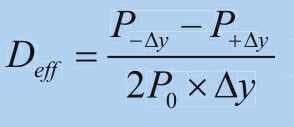  
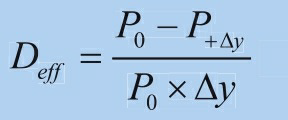  
整理後  
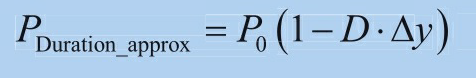  
  
債券估值&真實價比較  
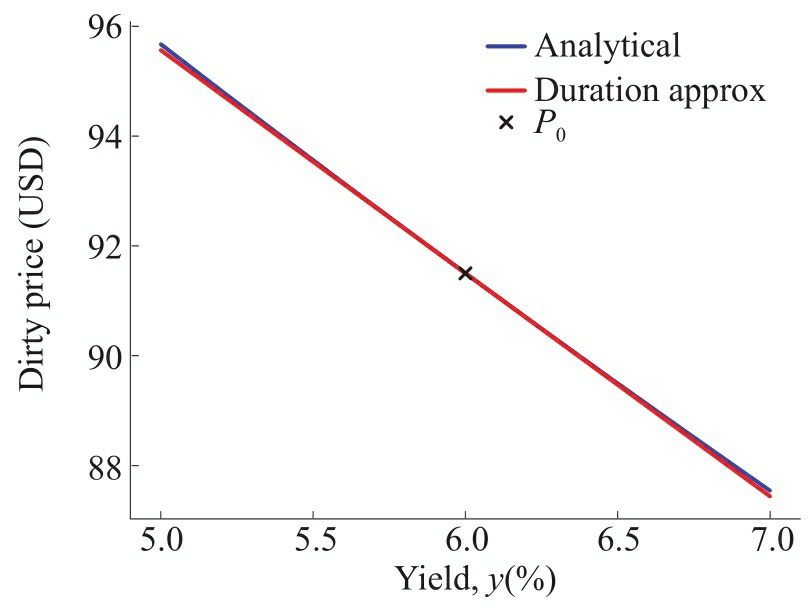  
  
y變動不同值時的估算誤差  
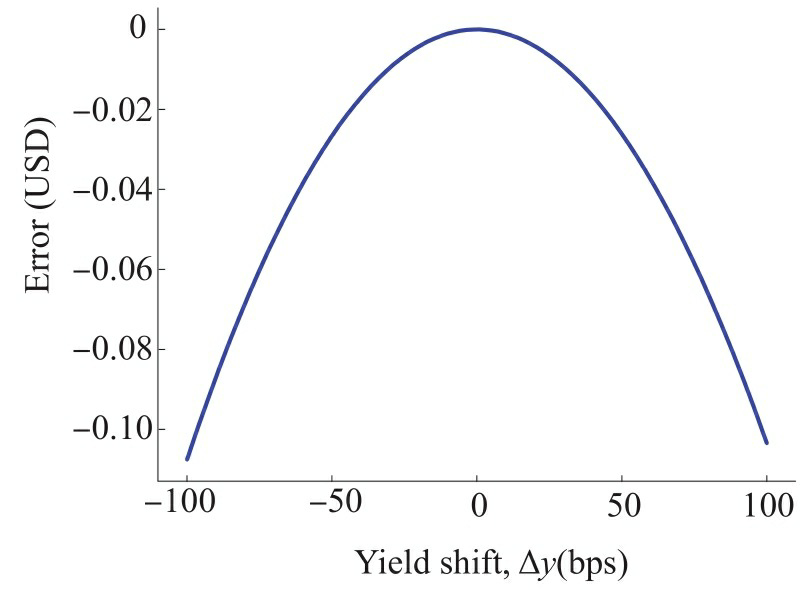


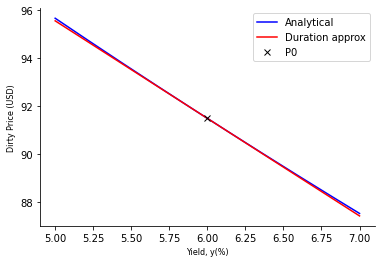

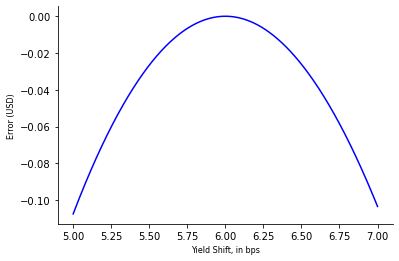

In [8]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(1, 7, 2020)
ql.Settings.instance().evaluationDate = todaysDate
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(1, 7, 2020)
maturityDate = ql.Date(15, 7, 2025)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
dayCount = ql.Thirty360()
couponRate = .04
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

delta_y_base = 0.0001
ytm = np.arange(5.0,7.0,delta_y_base)*0.01
approxPrice = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))


P0 = fixedRateBond.dirtyPrice(0.06,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_up = fixedRateBond.dirtyPrice(0.060 + delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_down = fixedRateBond.dirtyPrice(0.060 - delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
duration = (P_down - P_up)/(2*P0*delta_y_base)

for i in range(len(ytm)):
    delta_y = ytm[i] - 0.06
    approxPrice[i] = P0*(1-duration*delta_y)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)    
plt.plot(ytm*100, dirtyPrice,label='Analytical',color = 'b')
plt.plot(ytm*100, approxPrice,color ='r',label='Duration approx')
plt.plot(6, P0,'x',color ='k',fillstyle='none',label='P0')
plt.legend(loc='upper right')
plt.xlabel('Yield, y(%)',fontsize=8)
plt.ylabel('Dirty Price (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.figure(2) 
plt.plot(ytm*100, approxPrice-dirtyPrice,color ='b')
plt.xlabel('Yield Shift, in bps',fontsize=8)
plt.ylabel('Error (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')









上三種duration只適用於parallel shift，對於非parallel應用key rate duration/partial duration  
即假設只有1個spot rate變化，其他不變  
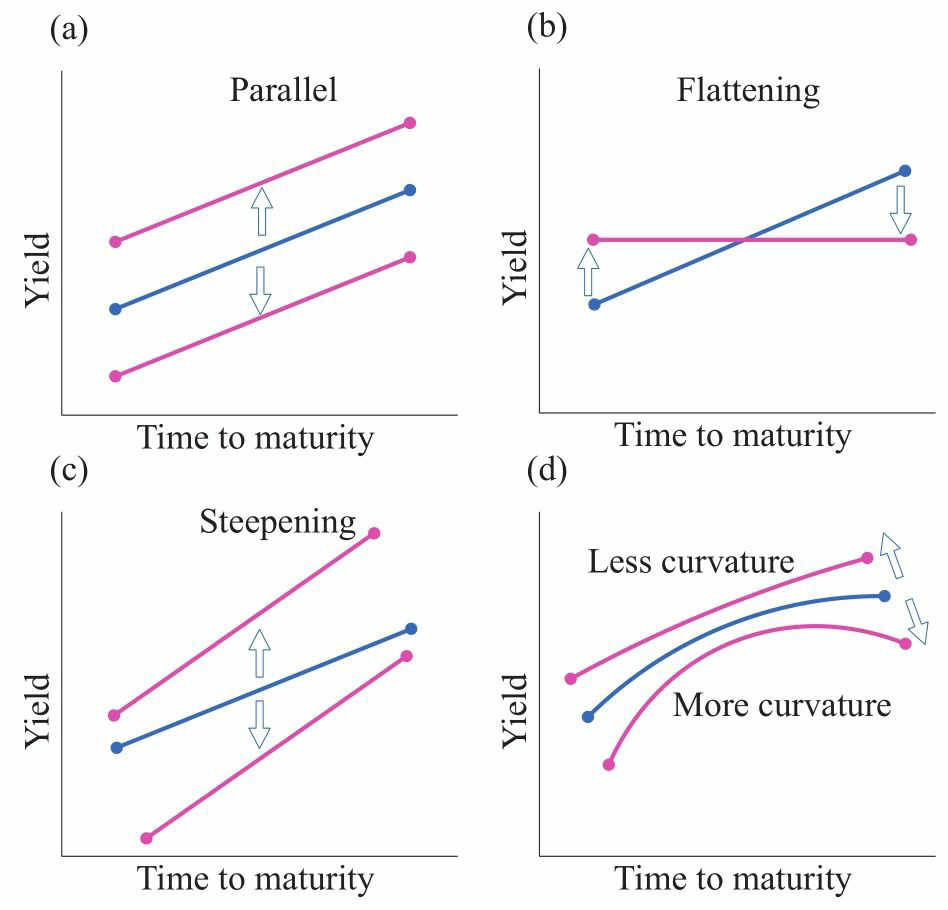  
  
krd以某些key rate為基礎，衡量債券價格對利率的敏感性(類似effective duration)    
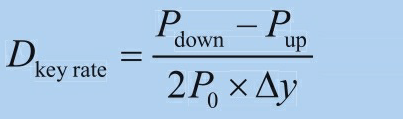  
紅叉=key rate(2 5 10 20)  
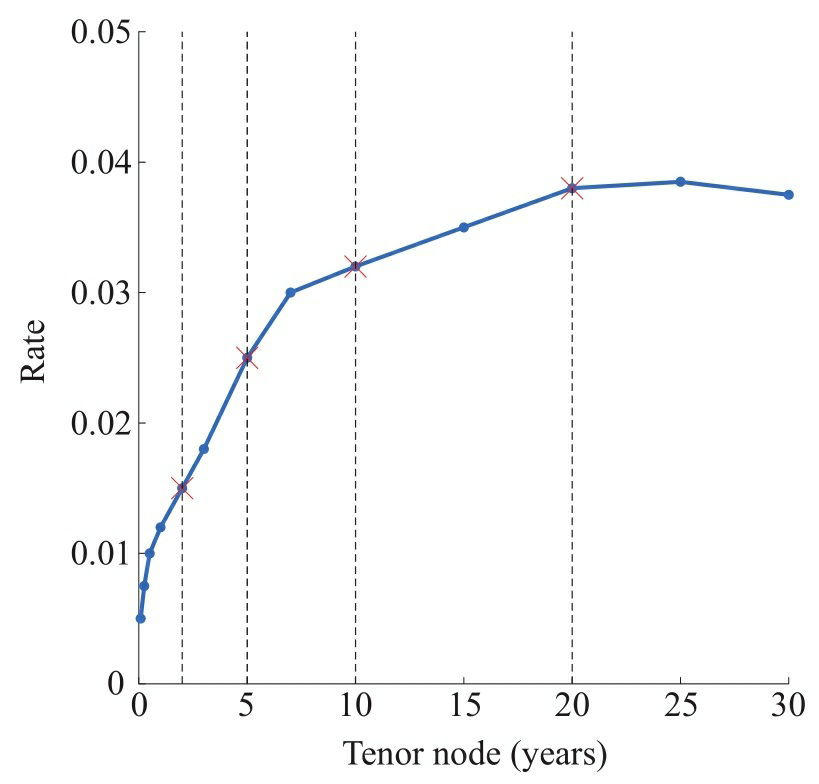  
  
左圖:5年期變動50bps，對其左右key rate(2 10)影響為零，但對非key rate(3 7)效果為線性遞減(即key rate 5年上升會拉高3 7)，故可用右圖粉色計p up      
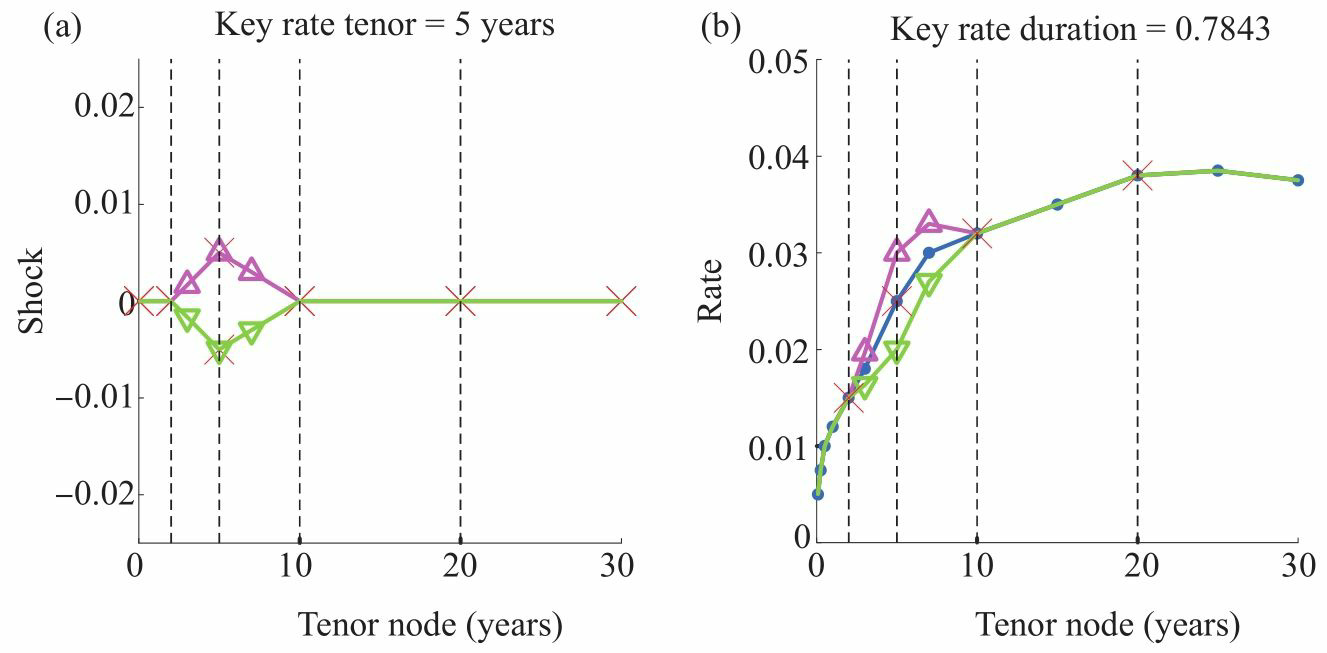  
同理，10年期例子  
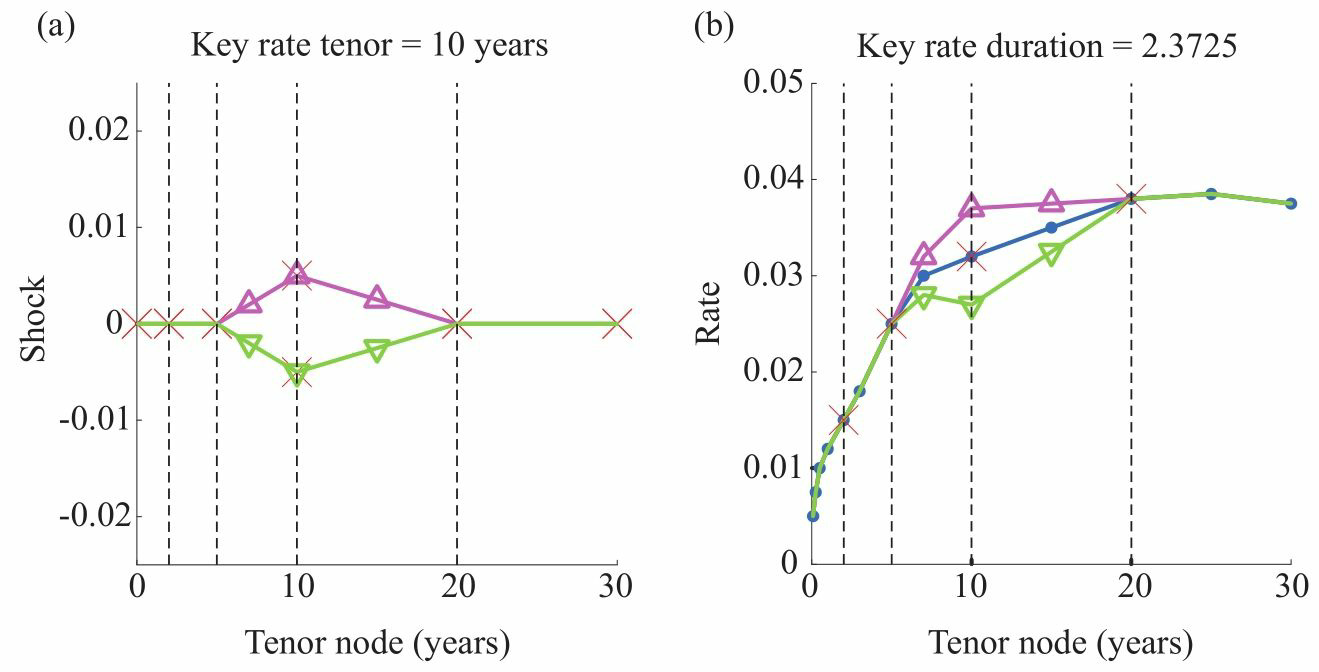  
對於頭尾key rate(2 20)，小於2年的非key rate與2年一致(即有shock時同增減量)，大於2年小於5年的則線上遞減;20年則相反  
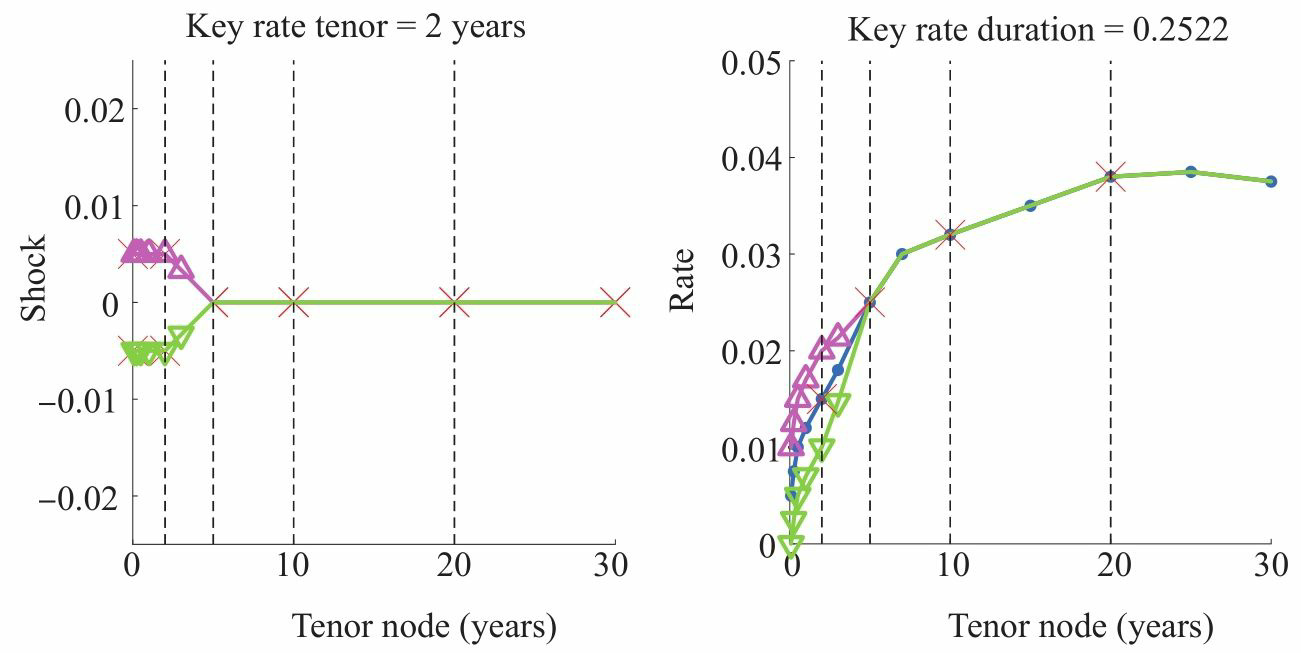  
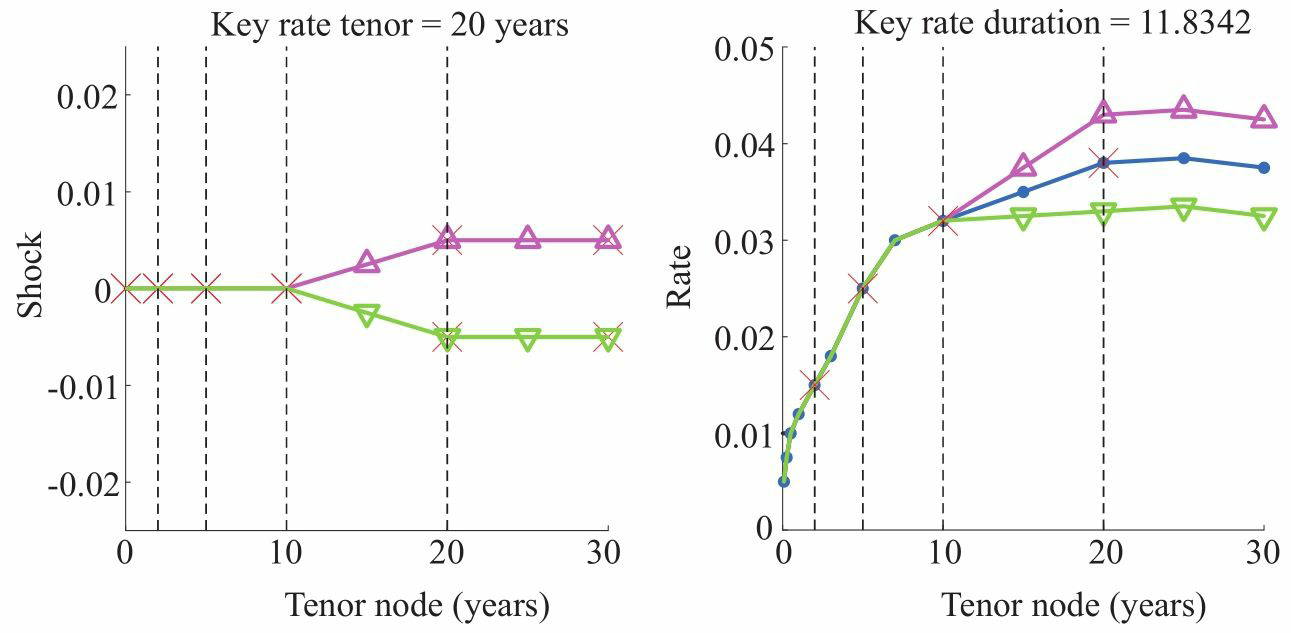

In [9]:
%matplotlib inline
import QuantLib as ql
import numpy as np

import matplotlib.pyplot as plt

todaysDate = ql.Date(18, 8, 2020)
tenor_tmp =[0, 1, 3, 6, 12, 24, 3*12, 5*12, 7*12, 10*12, 15*12, 20*12, 25*12, 30*12]
spotDates = [ todaysDate + ql.Period(x,ql.Months) for x in tenor_tmp ]
spotRates = [0.0, 0.005, 0.0075, 0.01, 0.012, 0.015, 0.018, 0.025, 0.03, 0.032, 0.035, 0.038, 0.0385, 0.0375]
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Semiannual

issueDate = ql.Date(18, 8, 2020)
maturityDate = ql.Date(18, 8, 2045)
tenor = ql.Period(ql.Semiannual)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
couponRate1 = .05
coupons1 = [couponRate1]

# Now lets construct the FixedRateBond
settlementDays = 0
faceValue = 100
fixedRateBond1 = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons1, dayCount)

ql.Settings.instance().evaluationDate = todaysDate
spotCurve = ql.ZeroCurve(spotDates, spotRates, dayCount, calendar, interpolation,
                             compounding, compoundingFrequency)
spotCurveHandle = ql.RelinkableYieldTermStructureHandle(spotCurve)
# create a bond engine with the term structure as input;
# set the bond to use this bond engine
bondEngine = ql.DiscountingBondEngine(spotCurveHandle)
fixedRateBond1.setPricingEngine(bondEngine)

# Finally the price
P0 = fixedRateBond1.dirtyPrice()
print(P0)

nodes = [ 0, 2, 5, 10, 20, 30 ]  # the durations
dates = [ todaysDate + ql.Period(n,ql.Years) for n in nodes ]
spreads = [ ql.SimpleQuote(0.0) for n in nodes ] # null spreads to begin
new_curve = ql.SpreadedLinearZeroInterpolatedTermStructure(
    ql.YieldTermStructureHandle(spotCurve),
    [ ql.QuoteHandle(q) for q in spreads ],
    dates)
spotCurveHandle.linkTo(new_curve)
bondEngine = ql.DiscountingBondEngine(spotCurveHandle)
fixedRateBond1.setPricingEngine(bondEngine)

delta_y = 0.005
for i in range(4):   
    if i == 0: # 2
        spreads[i].setValue(-delta_y) #0.005 50 bps
        spreads[i + 1].setValue(-delta_y) #0.005 50 bps
        P_down = fixedRateBond1.dirtyPrice()
        print(P_down)
        
        spreads[i].setValue(delta_y) #0.005 50 bps
        spreads[i + 1].setValue(delta_y) #0.005 50 bps
        P_up = fixedRateBond1.dirtyPrice()
        print(P_up)
        
        duration = (P_down - P_up)/(2*P0*delta_y) 
        print(duration)
        
        spreads[i].setValue(0) #0.005 50 bps
        spreads[i + 1].setValue(0) #0.005 50 bps
        
    elif i == 3:#20
        plt.figure(i)
        spreads[i + 1].setValue(-delta_y) #0.005 50 bps
        spreads[i + 2].setValue(-delta_y) #0.005 50 bps
        P_down = fixedRateBond1.dirtyPrice()
        print(P_down)
        
        spreads[i + 1].setValue(delta_y) #0.005 50 bps
        spreads[i + 2].setValue(delta_y) #0.005 50 bps
        P_up = fixedRateBond1.dirtyPrice() 
        print(P_up)
        
        duration = (P_down - P_up)/(2*P0*delta_y) 
        print(duration)
        
        spreads[i + 1].setValue(0.0) #0.005 50 bps
        spreads[i + 2].setValue(0.0) #0.005 50 bps
        
    else:#5 10
        plt.figure(i)
        spreads[i + 1].setValue(-delta_y) #0.005 50 bps
        P_down = fixedRateBond1.dirtyPrice()
        print(P_down)
        
        spreads[i + 1].setValue(delta_y) #0.005 50 bps
        P_up = fixedRateBond1.dirtyPrice() 
        print(P_up)
        
        duration = (P_down - P_up)/(2*P0*delta_y) 
        print(duration)
        spreads[i + 1].setValue(0.0) #0.005 50 bps









122.11819236382954
122.27280667588722
121.96484417223118
0.25218396841194896
122.60163403960796
121.64380919787493
0.7843424662554446
123.5945009084255
120.69719385803899
2.3725433486228673
129.7505442200993
115.29882927769611
11.834203129495119


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Convexity>債券價格對利率的2階導數  
Convexity(A>0-putable C<0-callable/mbs B=0)  
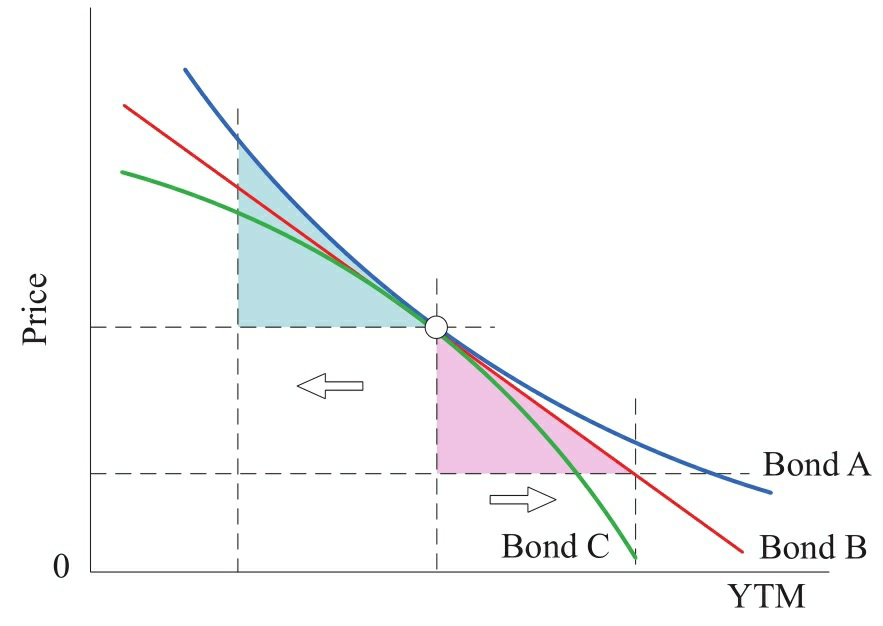  
如投資人認為市場Convexity高估>賣Convexity(買負convexity 即callable) 
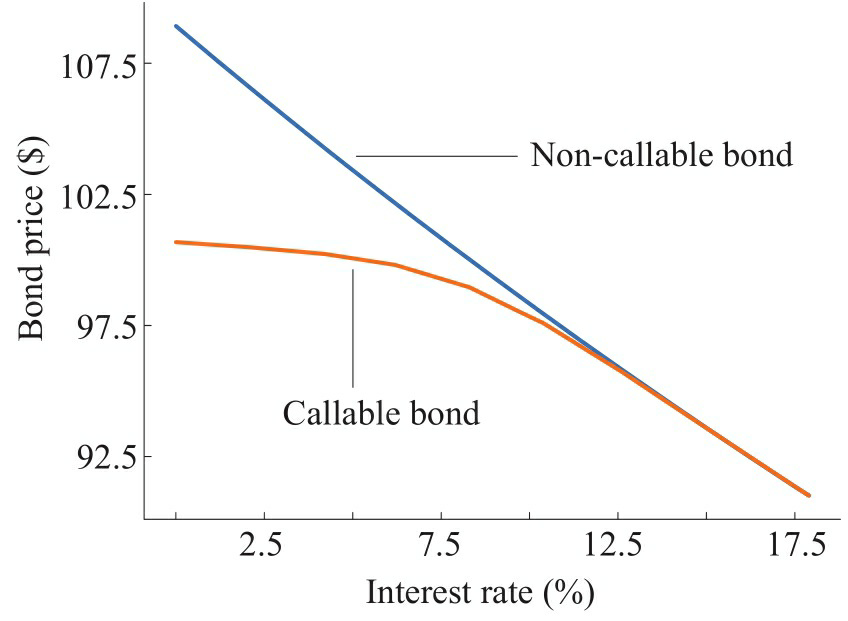  
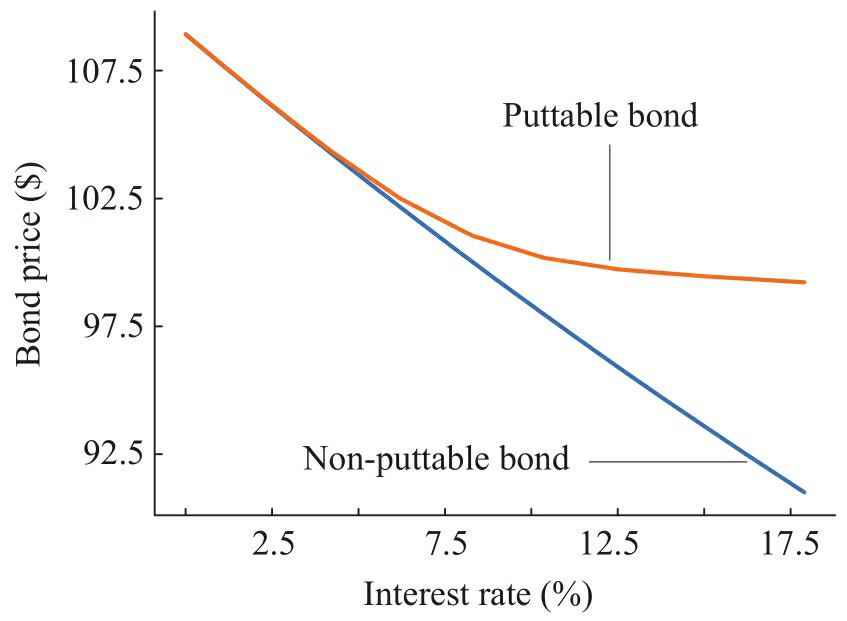 


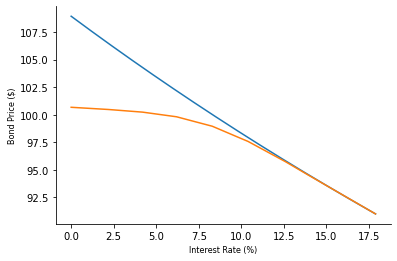

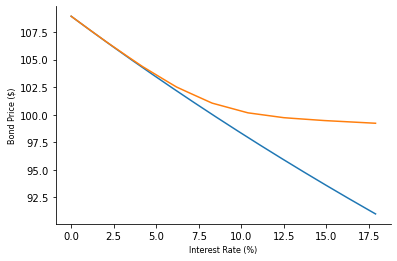

In [10]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

def value_bond(a, s, grid_points, bond):
    model = ql.HullWhite(ts_handle, a, s)
    engine = ql.TreeCallableFixedRateBondEngine(model, grid_points)
    bond.setPricingEngine(engine)
    return bond

calc_date = ql.Date(16,8,2016)
ql.Settings.instance().evaluationDate = calc_date
day_count = ql.ActualActual(ql.ActualActual.Bond)
callability_schedule_call = ql.CallabilitySchedule()
callability_schedule_put = ql.CallabilitySchedule()
call_price = 100.0
call_date = ql.Date(15,ql.September,2016);
null_calendar = ql.NullCalendar();
for i in range(0,2):
    
    callability_price  = ql.BondPrice(call_price, ql.BondPrice.Clean)
    #callability_price  = ql.CallabilityPrice(call_price, ql.CallabilityPrice.Clean)
    callability_schedule_call.append(ql.Callability(callability_price,ql.Callability.Call,call_date))
    callability_schedule_put.append(
            ql.Callability(callability_price, 
                           ql.Callability.Put,
                           call_date))

    call_date = null_calendar.advance(call_date, 12, ql.Months);
    
issue_date = ql.Date(16,ql.September,2015)        
maturity_date = ql.Date(15,ql.September,2017)
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
tenor = ql.Period(ql.Quarterly)
accrual_convention = ql.Unadjusted

schedule = ql.Schedule(issue_date, maturity_date, tenor,
                       calendar, accrual_convention, accrual_convention,
                       ql.DateGeneration.Backward, False)    

settlement_days = 0
face_amount = 100
accrual_daycount = ql.ActualActual(ql.ActualActual.Bond)
coupon = 0.0825

bond = ql.FixedRateBond(
    settlement_days, face_amount,
    schedule, [coupon], accrual_daycount)

callable_bond = ql.CallableFixedRateBond(
    settlement_days, face_amount,
    schedule, [coupon], accrual_daycount,
    ql.Following, face_amount, issue_date,
    callability_schedule_call)

puttable_bond = ql.CallableFixedRateBond(
    settlement_days, face_amount,
    schedule, [coupon], accrual_daycount,
    ql.Following, face_amount, issue_date,
    callability_schedule_put)

rate = np.arange(0.0,0.18,0.001)
bond_price = np.zeros(len(rate))
callable_bond_price = np.zeros(len(rate))
puttable_bond_price = np.zeros(len(rate))

for i in range(len(rate)):
    ts = ql.FlatForward(calc_date, 
                        rate[i], 
                        day_count, 
                        ql.Compounded, 
                        ql.Semiannual)
    ts_handle = ql.YieldTermStructureHandle(ts)
    
    bondEngine = ql.DiscountingBondEngine(ts_handle)
    bond.setPricingEngine(bondEngine)

    callable_bond_price[i] = value_bond(0.03, 0.1, 80, callable_bond).cleanPrice()
    puttable_bond_price[i] = value_bond(0.03, 0.1, 80, puttable_bond).cleanPrice()
    bond_price[i] = bond.cleanPrice()

plt.figure(1)    
plt.plot(rate*100, bond_price)
plt.plot(rate*100, callable_bond_price)
plt.xlabel('Interest Rate (%)',fontsize=8)
plt.ylabel('Bond Price ($)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.figure(2)
plt.plot(rate*100, bond_price)
plt.plot(rate*100, puttable_bond_price)
plt.xlabel('Interest Rate (%)',fontsize=8)
plt.ylabel('Bond Price ($)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')




其他狀況不變下，到期時間愈長，Convexity愈大;coupon愈大，convexity愈小    
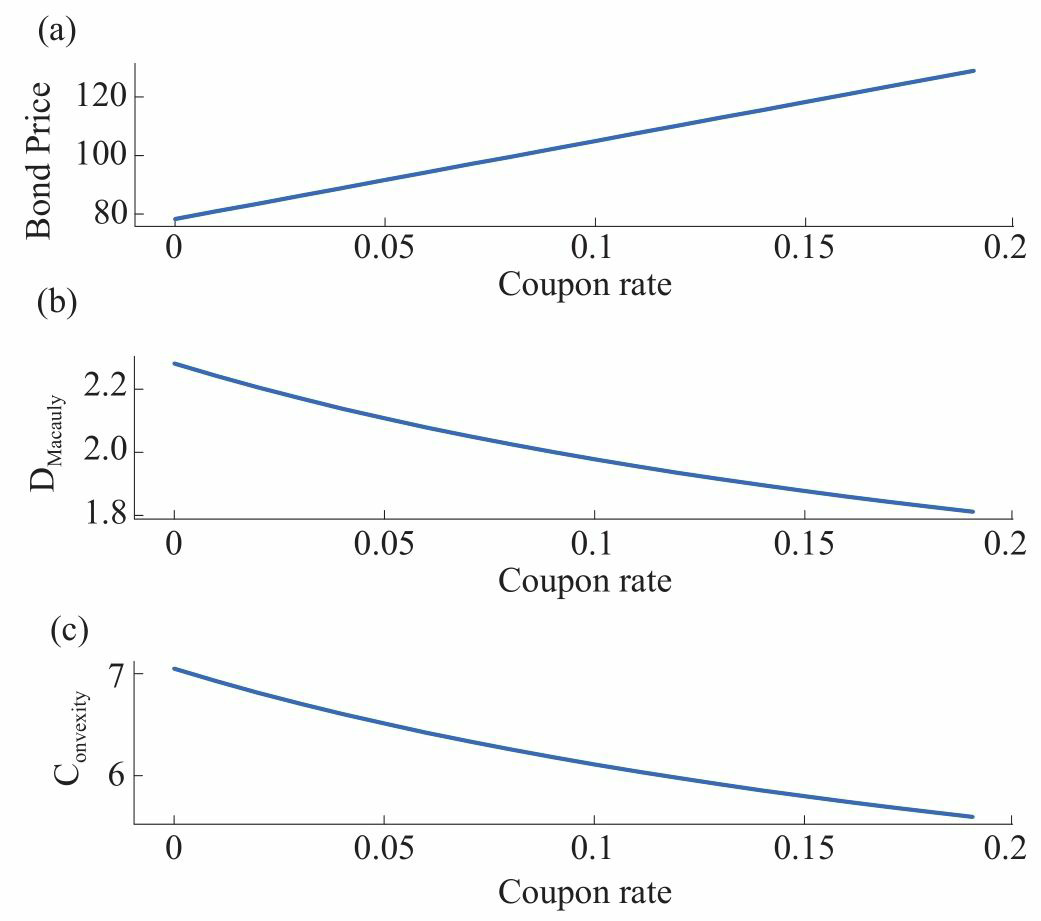

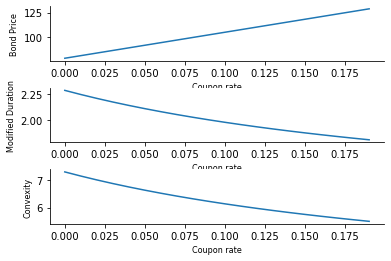

In [11]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
dayCount = ql.Thirty360()
ytm = .1

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100

couponRate = np.arange(0,0.2,0.01)
duration_mod = np.zeros(len(couponRate))
dirtyPrice = np.zeros(len(couponRate))
convexity = np.zeros(len(couponRate))

for i in range(len(couponRate)):
    coupons = [couponRate[i]]
    fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,ytm,ql.ActualActual(), ql.Compounded, ql.Annual, ql.Duration.Modified)
    convexity[i] = ql.BondFunctions.convexity(fixedRateBond,ytm,ql.ActualActual(), ql.Compounded, ql.Annual)
    # cleanPrice[i] = fixedRateBond.cleanPrice(Coupon rate[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)
plt.subplot(311)    
plt.plot(couponRate, dirtyPrice)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Bond Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(couponRate, duration_mod)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Modified Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(couponRate, convexity)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Convexity',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)


YTM愈小，Convexity與duration愈大  
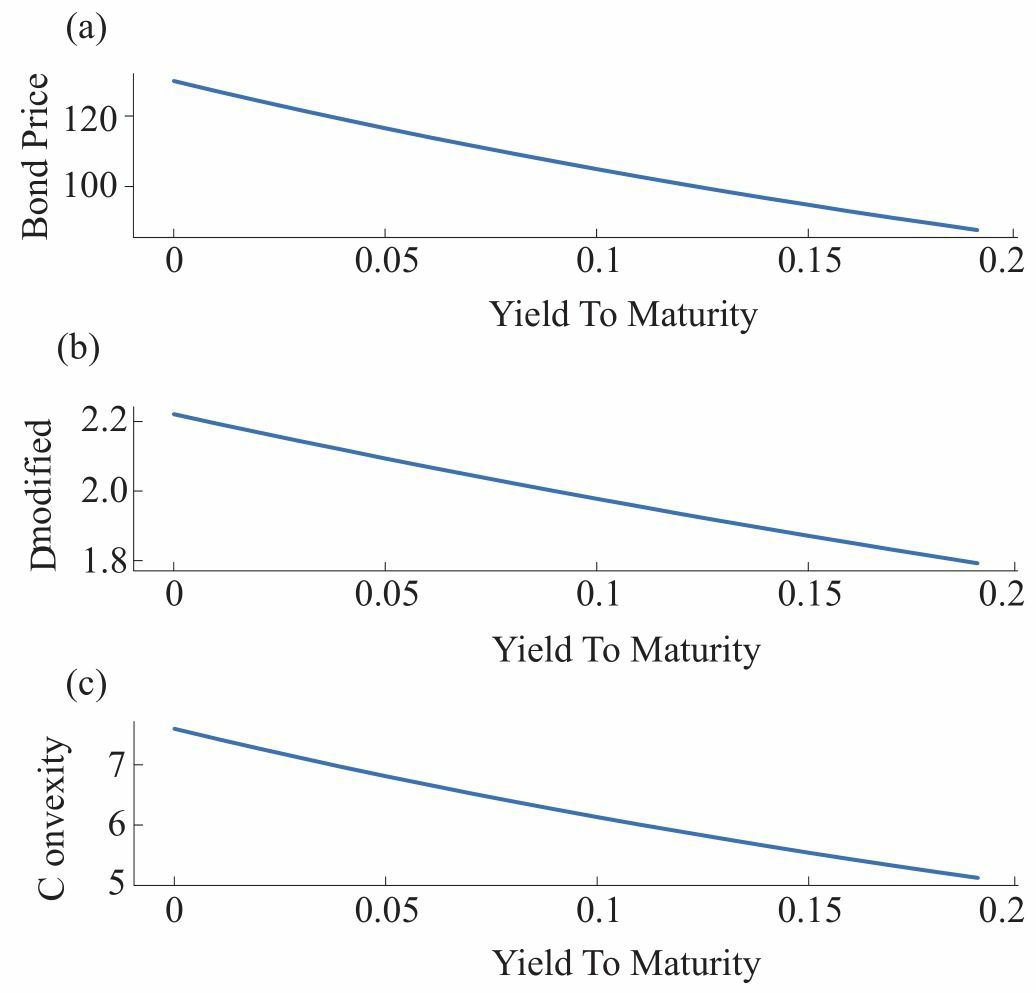

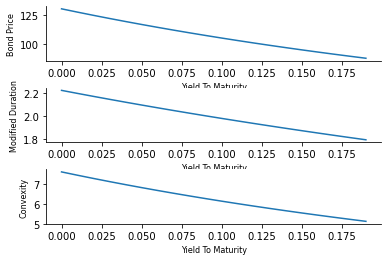

In [12]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
dayCount = ql.Thirty360()
couponRate = .1
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

ytm = np.arange(0,0.2,0.01)
duration_mod = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))
convexity = np.zeros(len(ytm))

for i in range(len(ytm)):
    y=ytm[i]
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,y,ql.ActualActual(), ql.Compounded, ql.Annual, ql.Duration.Modified)
    convexity[i] = ql.BondFunctions.convexity(fixedRateBond,y,ql.ActualActual(), ql.Compounded, ql.Annual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)
plt.subplot(311)    
plt.plot(ytm, dirtyPrice)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Bond Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(ytm, duration_mod)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Modified Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(ytm, convexity)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Convexity',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)


Effective Convexity  
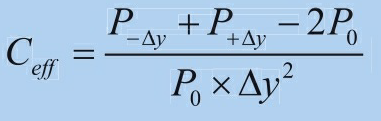  
債券價格變化  
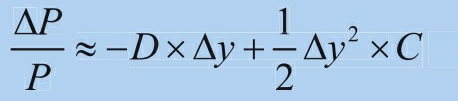  
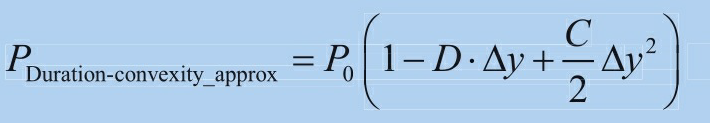  
估計法與真實誤差  
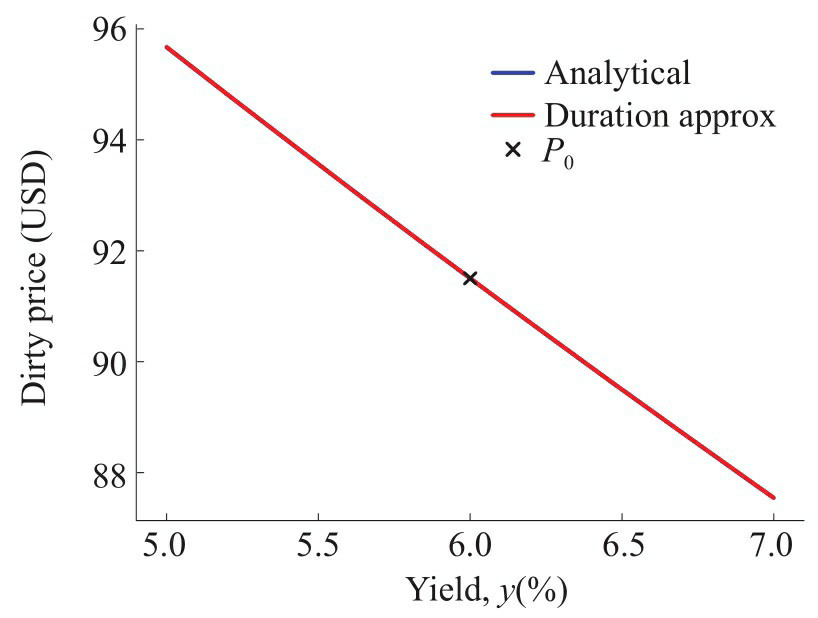  
y不同值下  
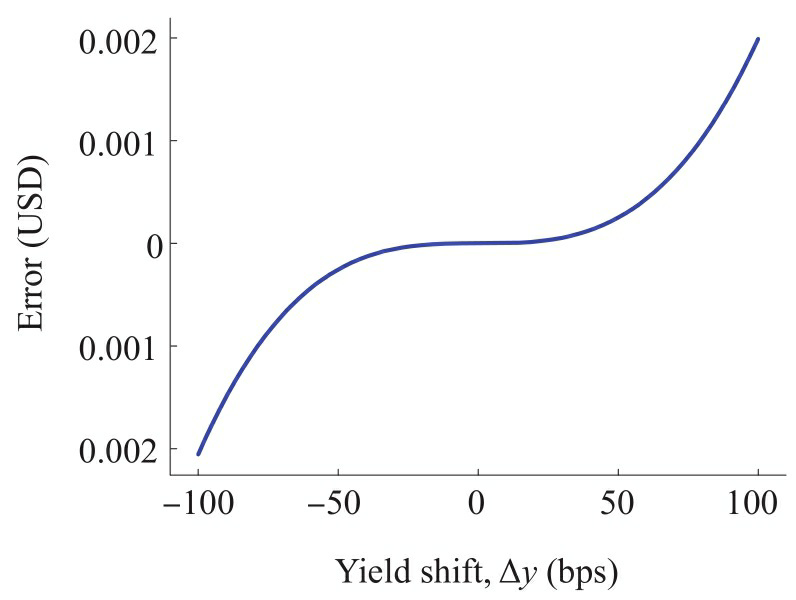  


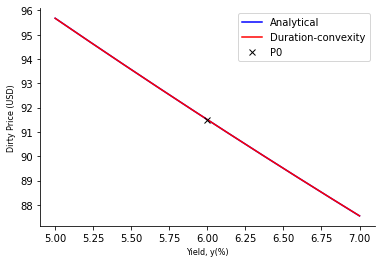

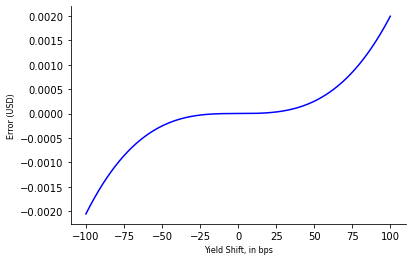

In [13]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(1, 7, 2020)
ql.Settings.instance().evaluationDate = todaysDate
dayCount = ql.Thirty360()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(1, 7, 2020)
maturityDate = ql.Date(15, 7, 2025)
# maturityDate = advance('UnitedStates/GovernmentBond', as.Date('2020-01-15'), 10, 3)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
dayCount = ql.Thirty360()
couponRate = .04
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

delta_y_base = 0.0001
ytm = np.arange(5.0,7.0,delta_y_base)*0.01
approxPrice = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))
delta_y = np.zeros(len(ytm))

P0 = fixedRateBond.dirtyPrice(0.06,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_up = fixedRateBond.dirtyPrice(0.060 + delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_down = fixedRateBond.dirtyPrice(0.060 - delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
duration = (P_down - P_up)/(2*P0*delta_y_base)
convexity = (P_down + P_up - 2*P0)/(P0*delta_y_base*delta_y_base)

for i in range(len(ytm)):
    delta_y[i] = ytm[i] - 0.06
    approxPrice[i] = P0*(1 - duration*delta_y[i] + 0.5*convexity*delta_y[i]*delta_y[i])
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)    
plt.plot(ytm*100, dirtyPrice,label='Analytical',color = 'b')
plt.plot(ytm*100, approxPrice,color ='r',label='Duration-convexity')
plt.plot(6, P0,'x',color ='k',fillstyle='none',label='P0')
plt.legend(loc='upper right')
plt.xlabel('Yield, y(%)',fontsize=8)
plt.ylabel('Dirty Price (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.figure(2) 
plt.plot(delta_y*10000, approxPrice-dirtyPrice,color ='b')
plt.xlabel('Yield Shift, in bps',fontsize=8)
plt.ylabel('Error (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
